# Factors that influence Trump share as % of vote by state

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf


In [2]:
election=pd.read_csv('https://raw.githubusercontent.com/mwaugh0328/Data_Bootcamp_Fall_2017/master/data_bootcamp_1127/trump_data.csv', encoding='latin-1')
#elections=pd.read_csv('/Users/marissaposner/Downloads/election_data.csv',encoding='latin-1')


In [3]:
election

,Unnamed: 0,population,income,NAME,county,state,FIPS,StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount,_merge,trump_share
0,0,55221.0,51281.0,"Autauga County, Alabama",1,1,1001.0,AL,alabama,1001,Autauga,24661,GOP,Trump,18110.0,both,0.734358
1,5,195121.0,50254.0,"Baldwin County, Alabama",3,1,1003.0,AL,alabama,1003,Baldwin,94090,GOP,Trump,72780.0,both,0.773515
2,10,26932.0,32964.0,"Barbour County, Alabama",5,1,1005.0,AL,alabama,1005,Barbour,10390,GOP,Trump,5431.0,both,0.522714
3,15,22604.0,38678.0,"Bibb County, Alabama",7,1,1007.0,AL,alabama,1007,Bibb,8748,GOP,Trump,6733.0,both,0.769662
4,20,57710.0,45813.0,"Blount County, Alabama",9,1,1009.0,AL,alabama,1009,Blount,25384,GOP,Trump,22808.0,both,0.898519
5,25,10678.0,31938.0,"Bullock County, Alabama",11,1,1011.0,AL,alabama,1011,Bullock,4701,GOP,Trump,1139.0,both,0.242289
6,30,20354.0,32229.0,"Butler County, Alabama",13,1,1013.0,AL,alabama,1013,Butler,8685,GOP,Trump,4891.0,both,0.563155
7,35,116648.0,41703.0,"Calhoun County, Alabama",15,1,1015.0,AL,alabama,1015,Calhoun,47376,GOP,Trump,32803.0,both,0.692397
8,40,34079.0,34177.0,"Chambers County, Alabama",17,1,1017.0,AL,alabama,1017,Chambers,13778,GOP,Trump,7803.0,both,0.566338
9,45,26008.0,36296.0,"Cherokee County, Alabama",19,1,1019.0,AL,alabama,1019,Cherokee,10503,GOP,Trump,8809.0,both,0.838713


In [4]:
election.columns

Index(['Unnamed: 0', 'population', 'income', 'NAME', 'county', 'state', 'FIPS',
       'StateCode', 'StateName', 'CountyFips', 'CountyName', 'CountyTotalVote',
       'Party', 'Candidate', 'VoteCount', '_merge', 'trump_share'],
      dtype='object')

In [19]:
reg=smf.ols('trump_share~ income',data=election).fit(); #~ = a function of
print(reg.params['income']*10000) #want income for 10000
#every increase in income by 10000, you get a -2.4% decrease in trump share
print(reg.summary())

-0.024420227967632883
                            OLS Regression Results                            
Dep. Variable:            trump_share   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     115.7
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           1.62e-26
Time:                        18:39:50   Log-Likelihood:                 1416.5
No. Observations:                3111   AIC:                            -2829.
Df Residuals:                    3109   BIC:                            -2817.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7499      0.0

In [6]:
-2.442e-06*10000 #when average income of a county goes up by 10000, trump share goes down by 2.5% 
#bc before it was -2.442e-06 for every dollar

#R-squared is a statistical measure of how close the data are to the fitted regression line.
#It is also known as coefficient of determination, or coefficient of multiple determination for multiple regression.
#the higher the R-squared, the better the model fits your data 
#3.6% of trump share can be explained by income (r^2)
#r squared tells you something but not inherently good or bad
# p value: 1.62e-26 very low
#T statistic: -10.756 
#probability of seeing something if nothing were going on: P>|t|: 0.000 
    #if true coefficient were really 0
#so income is a determinent and statistically significant 

-0.02442

In [7]:
#check for population 
reg2=smf.ols('trump_share~population',data=election).fit(); #~ = a function of
#r^2 =12 % 
#can see different options reg. 
#reg.predict()
#array([0.64375843, 0.6203774 , 0.64848628, ..., 0.64948937, 0.65158347,0.65179205])

reg2.params #series so can select something 
reg2.params['population']*1000000

-0.16712674644879424

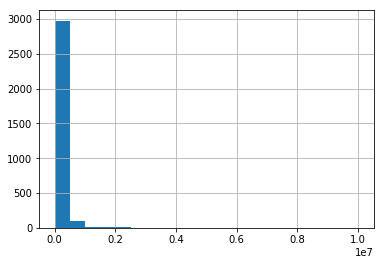

In [8]:
election['population'].hist(bins=20);
#so skewed so that is a hint we want to do the log

In [9]:
election['population'].describe()

count    3.112000e+03
mean     1.014722e+05
std      3.244532e+05
min      1.170000e+02
25%      1.120550e+04
50%      2.601000e+04
75%      6.793625e+04
max      1.003839e+07
Name: population, dtype: float64

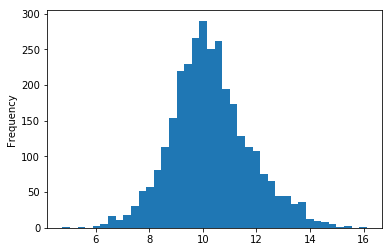

In [10]:
np.log(election['population']).plot.hist(bins=40);

In [11]:
loppop=np.log(election['population'])

In [21]:
print(smf.ols('trump_share~np.log(population)',data=election).fit().summary())
#r^2 0.252
#1% change in population causes a .005% 
#capture non linearitys in this relationship 
#doubling of population leads to a 5% decrease in trump share  (#np.log(population)  -0.0535) 

                            OLS Regression Results                            
Dep. Variable:            trump_share   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     1048.
Date:                Wed, 17 Apr 2019   Prob (F-statistic):          1.95e-198
Time:                        18:43:11   Log-Likelihood:                 1811.3
No. Observations:                3112   AIC:                            -3619.
Df Residuals:                    3110   BIC:                            -3606.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.1862      0

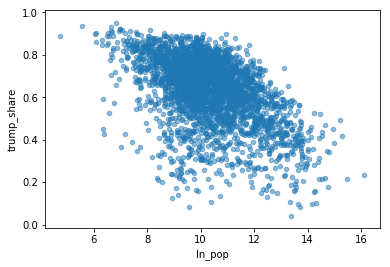

In [71]:
election['ln_pop']=np.log(election['population'])
election.plot.scatter(y='trump_share',x='ln_pop',alpha=.5);

#transform data using non linear transformation 

In [22]:
reg3=smf.ols('trump_share~np.log(population)',data=election).fit()
print(reg3.summary())
#every time population doubles, 5% less trump share  
#doubling is the unit increase in log world 
#log=change in x/x so it =1 when the population doubles

                            OLS Regression Results                            
Dep. Variable:            trump_share   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     1048.
Date:                Wed, 17 Apr 2019   Prob (F-statistic):          1.95e-198
Time:                        18:44:05   Log-Likelihood:                 1811.3
No. Observations:                3112   AIC:                            -3619.
Df Residuals:                    3110   BIC:                            -3606.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.1862      0

In [30]:
regr3=smf.ols('trump_share~income+np.log(population)',data=election).fit()


print(regr3.params['income']*10000)
print(regr3.summary())

-0.0006755850955527866
                            OLS Regression Results                            
Dep. Variable:            trump_share   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     522.1
Date:                Wed, 17 Apr 2019   Prob (F-statistic):          3.13e-196
Time:                        18:49:56   Log-Likelihood:                 1810.3
No. Observations:                3111   AIC:                            -3615.
Df Residuals:                    3108   BIC:                            -3596.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept    

In [5]:
regr1=smf.ols('trump_share~ income',data=election).fit(); #~ = a function of
regr2=smf.ols('trump_share~np.log(population)',data=election).fit()
regr3=smf.ols('trump_share~income+np.log(population)',data=election).fit()


In [28]:
print(regr1.params['income']*10000)
print(regr3.params['income']*10000) 
print(regr2.params['np.log(population)'])
print(regr3.params['np.log(population)'])

-0.024420227967632883
-0.0006755850955527866
-0.0534939232231742
-0.05332151644710255


In [34]:
election['ln_pop']=np.log(election['population']) #create as a variable to do a correlation
election[['ln_pop','income']].corr() 
#higher income counties are more populus 

,ln_pop,income
ln_pop,1.000000,0.368669
income,0.368669,1.000000


In [6]:
regr4=smf.ols('trump_share ~income +np.log(population)+StateName',data=election).fit()
print(regr4.params)
print(regr4.summary())
#alabama is intercept
#p value is basically 0 so basically statistically significant 
#within state variance counties that are higher income
#have a higher livelihood of voting for trump its only between states we see this negative effect

Intercept                            1.133617
StateName[T.arizona]                -0.066153
StateName[T.arkansas]               -0.021968
StateName[T.california]             -0.158684
StateName[T.colorado]               -0.147150
StateName[T.connecticut]            -0.140231
StateName[T.delaware]               -0.103664
StateName[T.district-of-columbia]   -0.507706
StateName[T.florida]                 0.016479
StateName[T.georgia]                -0.028782
StateName[T.hawaii]                 -0.313496
StateName[T.idaho]                  -0.033487
StateName[T.illinois]               -0.038268
StateName[T.indiana]                 0.015938
StateName[T.iowa]                   -0.090200
StateName[T.kansas]                  0.005964
StateName[T.kentucky]                0.052024
StateName[T.louisiana]              -0.016424
StateName[T.maine]                  -0.151673
StateName[T.maryland]               -0.118947
StateName[T.massachusetts]          -0.267783
StateName[T.michigan]             

In [13]:
#include state level fixed effects

#print(regr2.params['income']*10000)
#print(regr3.params['income']*10000)
#print(regr4.params['income']*10000)

In [41]:
print(regr2.params['np.log(population)'])
print(regr3.params['np.log(population)'])
print(regr4.params['np.log(population)'])
#within state effects of population are lower than overall effects of population

-0.0534939232231742
-0.05332151644710255
-0.05118330108291602


In [42]:
election.loc[election['StateName']=='alabama','trump_share'].mean()
#alabama had 64% voting for trump

0.6441188355930719

In [43]:
election.loc[election['StateName']=='florida','trump_share'].mean()
#lower trump share but higher intercept above --> this tells us that some other favtor
#after u control for population and income alabama loses its 'trumpness'
#state effect is positive (just it being florida)

0.6202500336173878

In [48]:
#aggregate to state level
election.groupby('StateName')['trump_share', 'income', 'ln_pop'].mean()
#group by state name adn then choose variables we want


,trump_share,income,ln_pop
StateName,,,
alabama,0.644119,37973.134328,10.612754
arizona,0.527431,43252.200000,11.745944
arkansas,0.648250,36626.480000,10.065633
california,0.438022,56013.155172,12.037495
colorado,0.559441,51263.187500,9.759371
connecticut,0.445295,71184.125000,12.675076
delaware,0.472282,58067.666667,12.499873
district-of-columbia,0.041221,70848.000000,13.380849
florida,0.620250,44046.477612,11.568853


In [51]:
#what if we want mean for trump share and income and sum for population 
election_state=election.groupby('StateName').agg({'trump_share': np.mean,'income':np.mean,'population':np.sum})
#pass in dictionary to agg
#overall population in state 

In [59]:
reg_state=smf.ols('trump_share ~income+np.log(population)',data=election_state).fit()
#as a func of
print(reg_state.summary())
#income is statistically significant 
#population isnt (doubling of population isnt even a 1% increase in trump share)

                            OLS Regression Results                            
Dep. Variable:            trump_share   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     15.23
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           7.96e-06
Time:                        20:37:50   Log-Likelihood:                 40.580
No. Observations:                  50   AIC:                            -75.16
Df Residuals:                      47   BIC:                            -69.42
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.8976      0

In [68]:
print(reg.params['income']*10000)
print(reg_state.params['income']*10000)

#richer states way less likely to vote for trump even if controlling for population 
#richer counties within state are more likely

-0.024420227967632883
-0.08884677663533867


In [69]:
print(regr4.params['np.log(population)'])
print(reg_state.params['np.log(population)'])

#using as proxy for how urban something is 

-0.05118330108291602
0.008272629420660656
